In [1]:
# Import Needed Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import xgboost
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
cid = 'f6f537de83784ff598bbf6f8d7bc5237'
secret = 'cf96af9e5ccd42399f8a11f58c7a873b'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [3]:
artist_name = []
track_name = []
popularity = []
track_id = []
duration_ms = []
key = []
time_signature = []
acousticness = []
danceability = []
energy = []
instrumentalness = []
liveness = []
loudness = []
speechiness = []
valence = []
tempo = []

      

In [4]:
import timeit
start = timeit.default_timer()

# create empty lists where the results are going to be stored
artist_name = []
track_name = []
popularity = []
track_id = []

for i in range(0,1000,50):
    track_results = sp.search(q='year:2020', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        popularity.append(t['popularity'])
stop = timeit.default_timer()
print ('Time to run this code (in seconds):', stop - start)

Time to run this code (in seconds): 6.1359877


In [5]:
import pandas as pd

df_tracks = pd.DataFrame({'artist_name':artist_name,'track_name':track_name,'track_id':track_id,'popularity':popularity})
print(df_tracks.shape)
df_tracks.head()

(1000, 4)


,artist_name,track_name,track_id,popularity
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96


In [6]:
start = timeit.default_timer()

# empty list, batchsize and the counter for None results
rows = []
batchsize = 100
None_counter = 0

for i in range(0,len(df_tracks['track_id']),batchsize):
    batch = df_tracks['track_id'][i:i+batchsize]
    feature_results = sp.audio_features(batch)
    for i, t in enumerate(feature_results):
        if t == None:
            None_counter = None_counter + 1
        else:
            rows.append(t)
            
print('Number of tracks where no audio features were available:',None_counter)

stop = timeit.default_timer()
print ('Time to run this code (in seconds):',stop - start)

Number of tracks where no audio features were available: 1
Time to run this code (in seconds): 2.0342073640000002


In [7]:
df_audio_features = pd.DataFrame.from_dict(rows,orient='columns')
print("Shape of the dataset:", df_audio_features.shape)
df_audio_features.head()

Shape of the dataset: (999, 18)


,acousticness,analysis_url,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526,0.722,3tjFYV6RSFtuktYl3ZtYcq,0.000000,7,0.2720,-3.558,0,0.0369,90.989,4,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541,0.454,4Oun2ylbjFKMPTiaSbbCih,0.000000,1,0.0824,-7.509,1,0.3750,133.073,4,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476,0.586,0PvFJmanyNQMseIFrU708S,0.000000,6,0.1930,-6.606,0,0.2000,125.971,4,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493,0.518,2SAqBLGA283SUiwJ3xOUVI,0.000035,0,0.1070,-8.871,1,0.1340,133.976,4,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,0.6500,https://api.spotify.com/v1/audio-analysis/1tkg...,0.709,160000,0.548,1tkg4EHVoqnhR6iFEXb60y,0.000002,10,0.1330,-8.493,1,0.3530,83.995,4,https://api.spotify.com/v1/tracks/1tkg4EHVoqnh...,audio_features,spotify:track:1tkg4EHVoqnhR6iFEXb60y,0.543


In [8]:
full_df = df_tracks.join(df_audio_features)

In [9]:
full_df.head()

,artist_name,track_name,track_id,popularity,acousticness,analysis_url,danceability,duration_ms,energy,id,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,uri,valence
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,https://api.spotify.com/v1/audio-analysis/3tjF...,0.700,140526.0,0.722,3tjFYV6RSFtuktYl3ZtYcq,...,0.2720,-3.558,0.0,0.0369,90.989,4.0,https://api.spotify.com/v1/tracks/3tjFYV6RSFtu...,audio_features,spotify:track:3tjFYV6RSFtuktYl3ZtYcq,0.756
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,https://api.spotify.com/v1/audio-analysis/4Oun...,0.935,187541.0,0.454,4Oun2ylbjFKMPTiaSbbCih,...,0.0824,-7.509,1.0,0.3750,133.073,4.0,https://api.spotify.com/v1/tracks/4Oun2ylbjFKM...,audio_features,spotify:track:4Oun2ylbjFKMPTiaSbbCih,0.357
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,https://api.spotify.com/v1/audio-analysis/0PvF...,0.823,190476.0,0.586,0PvFJmanyNQMseIFrU708S,...,0.1930,-6.606,0.0,0.2000,125.971,4.0,https://api.spotify.com/v1/tracks/0PvFJmanyNQM...,audio_features,spotify:track:0PvFJmanyNQMseIFrU708S,0.347
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,https://api.spotify.com/v1/audio-analysis/2SAq...,0.761,261493.0,0.518,2SAqBLGA283SUiwJ3xOUVI,...,0.1070,-8.871,1.0,0.1340,133.976,4.0,https://api.spotify.com/v1/tracks/2SAqBLGA283S...,audio_features,spotify:track:2SAqBLGA283SUiwJ3xOUVI,0.522
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96,0.6500,https://api.spotify.com/v1/audio-analysis/1tkg...,0.709,160000.0,0.548,1tkg4EHVoqnhR6iFEXb60y,...,0.1330,-8.493,1.0,0.3530,83.995,4.0,https://api.spotify.com/v1/tracks/1tkg4EHVoqnh...,audio_features,spotify:track:1tkg4EHVoqnhR6iFEXb60y,0.543


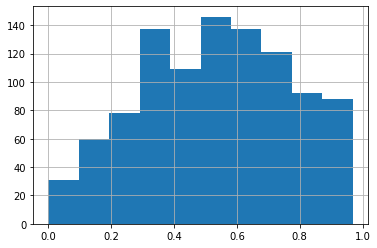

In [10]:
full_df['valence'].hist()

In [11]:
full_df = full_df.drop(['analysis_url','track_href','uri','id'],axis=1)

In [12]:
full_df['key'].value_counts()

1.0     130
6.0     116
5.0     103
11.0     99
0.0      93
7.0      88
8.0      78
10.0     74
9.0      73
4.0      71
2.0      58
3.0      16
Name: key, dtype: int64

In [13]:
full_df['feature_artist/songname'] = full_df['track_name']

In [14]:
time_pop = full_df.groupby(['time_signature']).agg({'popularity':'mean'}).reset_index()

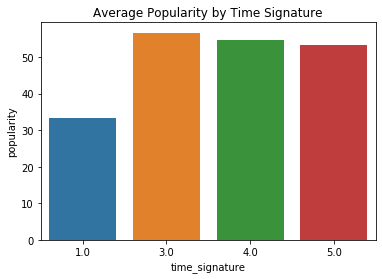

In [15]:
sns.barplot(x=time_pop['time_signature'],y=time_pop['popularity']);
plt.title('Average Popularity by Time Signature');

In [16]:
time_pop_sum = full_df.groupby(['time_signature']).agg({'popularity':'sum'}).reset_index()

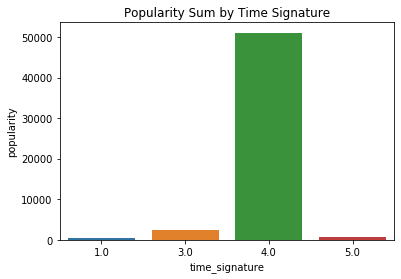

In [17]:
sns.barplot(x=time_pop_sum['time_signature'],y=time_pop_sum['popularity']);
plt.title('Popularity Sum by Time Signature');

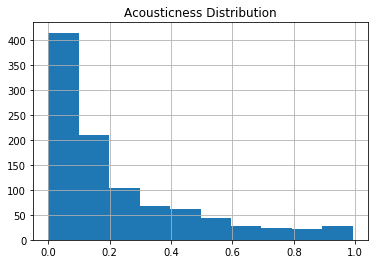

In [18]:
full_df['acousticness'].hist()
plt.title('Acousticness Distribution');

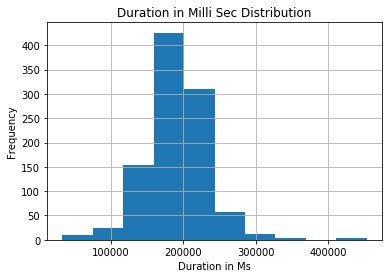

In [19]:
full_df['duration_ms'].hist()
plt.title('Duration in Milli Sec Distribution')
plt.xlabel('Duration in Ms')
plt.ylabel('Frequency');

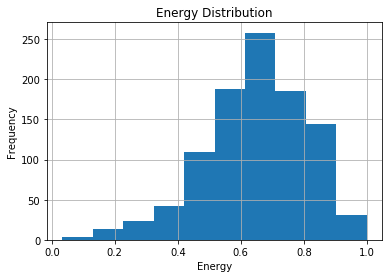

In [20]:
full_df['energy'].hist()
plt.title('Energy Distribution');
plt.xlabel('Energy')
plt.ylabel('Frequency');

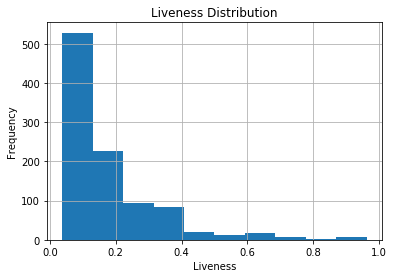

In [21]:
full_df['liveness'].hist()
plt.title('Liveness Distribution');
plt.xlabel('Liveness')
plt.ylabel('Frequency');

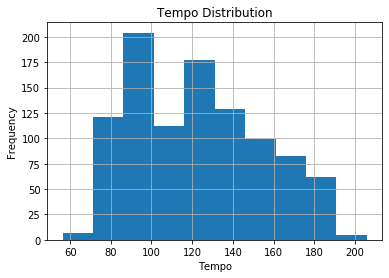

In [22]:
full_df['tempo'].hist()
plt.title('Tempo Distribution');
plt.xlabel('Tempo')
plt.ylabel('Frequency');

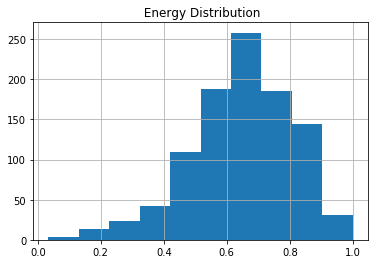

In [23]:
df_audio_features['energy'].hist()
plt.title(' Energy Distribution');

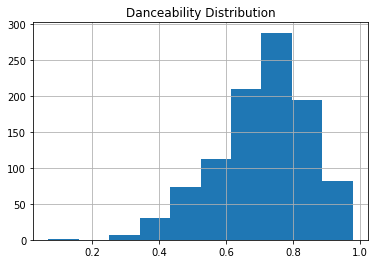

In [24]:
df_audio_features['danceability'].hist()
plt.title('Danceability Distribution');

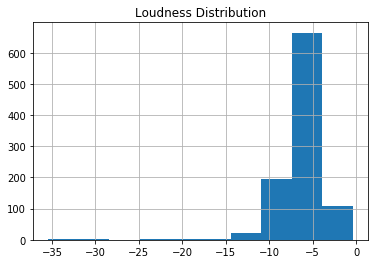

In [25]:
df_audio_features['loudness'].hist()
plt.title('Loudness Distribution');

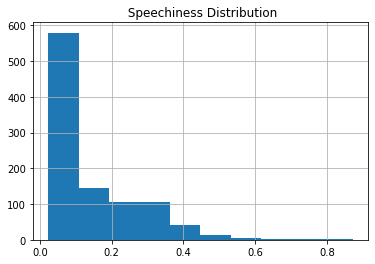

In [26]:
df_audio_features['speechiness'].hist()
plt.title(' Speechiness Distribution');

In [27]:
key_pop = full_df.groupby(['key']).agg({'popularity':'mean'}).reset_index()

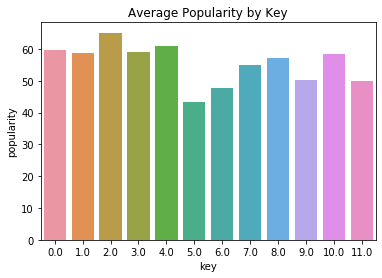

In [28]:
sns.barplot(x=key_pop['key'],y=key_pop['popularity']);
plt.title('Average Popularity by Key');

In [29]:
key_pop_sum = full_df.groupby(['key']).agg({'popularity':'sum'}).reset_index()

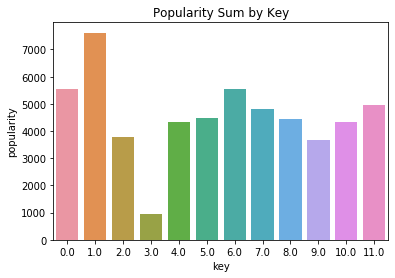

In [30]:
sns.barplot(x=key_pop_sum['key'],y=key_pop_sum['popularity']);
plt.title('Popularity Sum by Key');

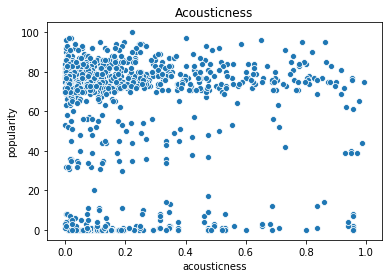

In [31]:
sns.scatterplot(x="acousticness", y="popularity", data=full_df)
plt.title('Acousticness');

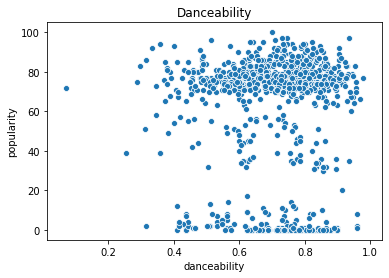

In [32]:
sns.scatterplot(x="danceability", y="popularity", data=full_df)
plt.title('Danceability');

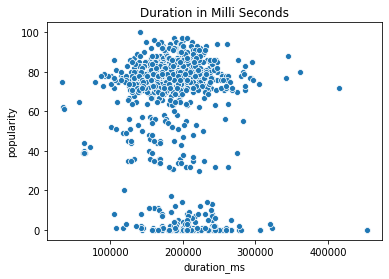

In [33]:
sns.scatterplot(x="duration_ms", y="popularity", data=full_df)
plt.title('Duration in Milli Seconds');

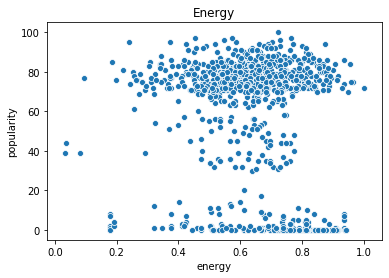

In [34]:
sns.scatterplot(x="energy", y="popularity", data=full_df)
plt.title('Energy');

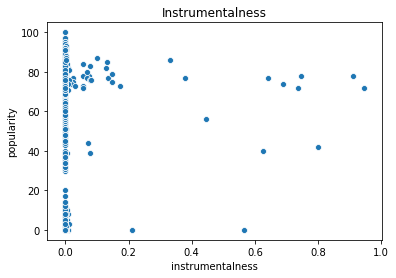

In [35]:
sns.scatterplot(x="instrumentalness", y="popularity", data=full_df)
plt.title('Instrumentalness');

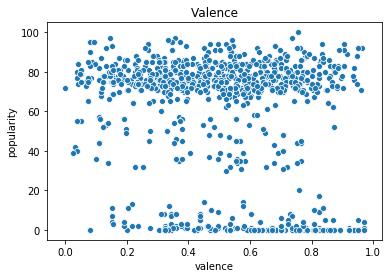

In [36]:
sns.scatterplot(x="valence", y="popularity", data=full_df)
plt.title('Valence');

In [37]:
df = full_df[full_df['popularity'] > 25]

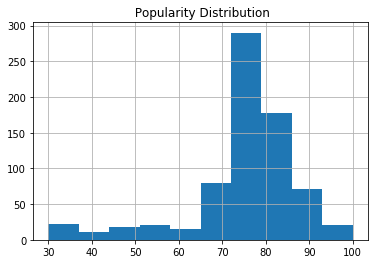

In [38]:
df['popularity'].hist()
plt.title(' Popularity Distribution');

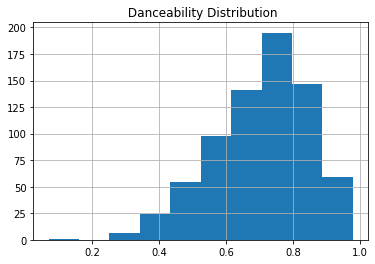

In [39]:
df['danceability'].hist()
plt.title(' Danceability Distribution');

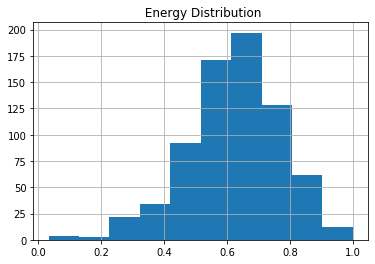

In [40]:
df['energy'].hist()
plt.title(' Energy Distribution');

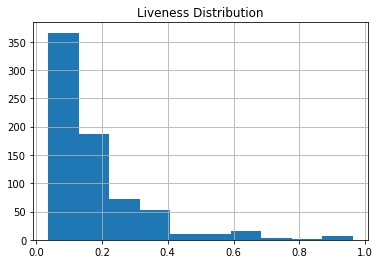

In [41]:
df['liveness'].hist()
plt.title('Liveness Distribution');

In [51]:
df = df.dropna()

# Splitting Training and Testing Data

In [52]:
# Come back to this and figure it out
y = df['popularity']
X = df.drop(['popularity','artist_name', 'track_name', 'track_id','type','feature_artist/songname'],axis=1)

# Train test split the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=2)

In [53]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,test_size=.2, random_state=2)

In [54]:

print(f'The shape of X_Train is {X_train.shape}')
print(f'The shape of X_test is {X_test.shape}')
print(f'The shape of X_val is {X_val.shape}')
print(f'The shape of Y_Train is {y_train.shape}')
print(f'The shape of Y_test is {y_test.shape}')
print(f'The shape of Y_val is {y_val.shape}')


The shape of X_Train is (464, 13)
The shape of X_test is (145, 13)
The shape of X_val is (116, 13)
The shape of Y_Train is (464,)
The shape of Y_test is (145,)
The shape of Y_val is (116,)


In [55]:
import warnings
warnings.filterwarnings('ignore')

In [56]:
X_train.columns

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

# Linear Regression Vanilla

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
# instantiate the model
linreg = LinearRegression()
# fit the model to the train data
linreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
# get the prediction
y_preds = linreg.predict(X_val)
# calculate the mse
mse_linreg = mean_squared_error(y_val, y_preds)

In [60]:

# print the mse
print(f'the mean squared error for Linear Regression Vanilla is: {mse_linreg}'.title())
print(f'The R^2 value is : {r2_score(y_val, y_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(linreg,X,y, cv=3))}')

The Mean Squared Error For Linear Regression Vanilla Is: 138.53248494812217
The R^2 value is : 0.15933081860946008
The cross val score is : -2.323888734728092


# XGBoost Vanilla

In [61]:
# instantiate the model
xgb = xgboost.XGBRegressor()
# fit the model to training data
xgb.fit(X_train,y_train)


[10:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [62]:
xgb_y_preds = xgb.predict(X_val)
mse_xgb = mean_squared_error(y_val,xgb_y_preds)
mse_xgb

159.7358532785058

In [63]:
print(f'The R^2 value of the XGBoost Model is : {r2_score(y_val,xgb_y_preds)} ')
print(f'The Mean squared error for the XGBoost model is {mse_xgb}')
print(f'The cross val score is : {np.mean(cross_val_score(xgb,X,y, cv=3))}')

The R^2 value of the XGBoost Model is : 0.030660504901445562 
The Mean squared error for the XGBoost model is 159.7358532785058
[10:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:36:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The cross val score is : -2.2064363664300135


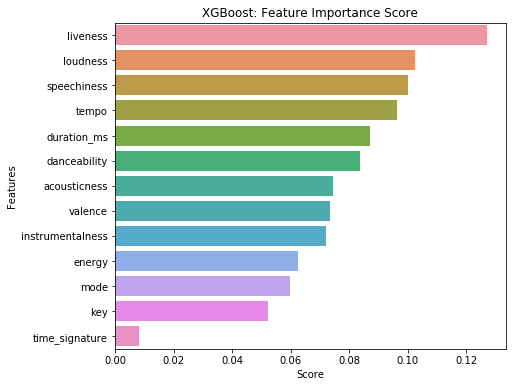

In [64]:
xgb_feat_imp = pd.DataFrame(xgb.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=xgb_feat_imp.index,x=xgb_feat_imp[0],orient='h');
plt.title('XGBoost: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# AdaBoost Vanilla

In [65]:
# instantaite adaboost model
ada = AdaBoostRegressor()

# fit the model to the train data
ada.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=50, random_state=None)

In [75]:
# get the prediction
ada_preds = ada.predict(X_val)
# get the MSE
mse_ada = mean_squared_error(y_val, ada_preds)
#print the mse
print(f'The Mean squared error for the ada boost model is {mse_ada}')
print(f'The R^2 value is : {ada.score(X_train,y_train)} ')
print(f'The cross val score is : {np.mean(cross_val_score(ada,X,y, cv=3))}')

The Mean squared error for the ada boost model is 180.54067298687977
The R^2 value is : 0.37279896412737035 
The cross val score is : -3.5430780450234693


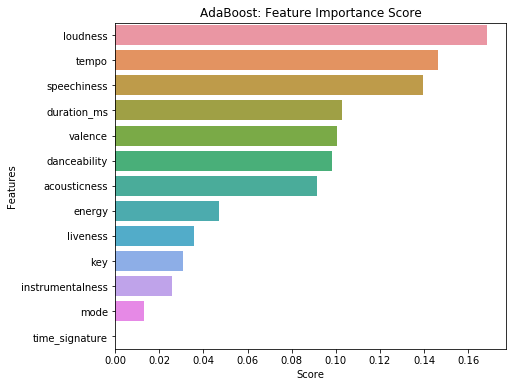

In [76]:
ada_feat_imp = pd.DataFrame(ada.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=ada_feat_imp.index,x=ada_feat_imp[0],orient='h');
plt.title('AdaBoost: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# GradientBoosting 

In [77]:
# import needed library
from sklearn.ensemble import GradientBoostingRegressor

In [78]:
# instantiate the model
gdb = GradientBoostingRegressor()
# fit the model to training data
gdb.fit(X_train,y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [79]:
# get predictions
gdb_preds = gdb.predict(X_val)

#get MeanSE
mse_gdb = mean_squared_error(gdb_preds,y_val)

print(f'the mean squared error for gradient boosting test data is {mse_gdb}')
print(f'The R^2 value is : {r2_score(y_val,gdb_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(gdb,X,y, cv=3))}')

the mean squared error for gradient boosting test data is 153.97832605650024
The R^2 value is : 0.06559942697715737
The cross val score is : -2.3279088797144567


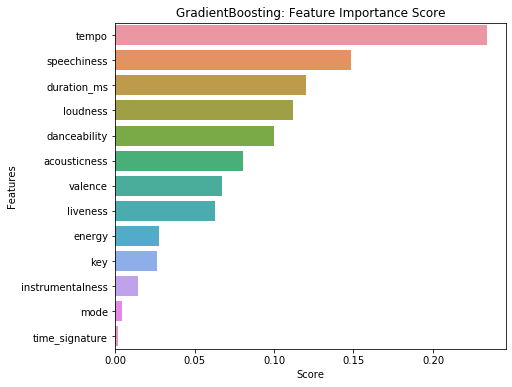

In [80]:
gdb_feat_imp = pd.DataFrame(gdb.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=gdb_feat_imp.index,x=gdb_feat_imp[0],orient='h');
plt.title('GradientBoosting: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# Random Forest

In [81]:
# instantiate the model
rfr = RandomForestRegressor()

# fit the model to training data
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [82]:
# Get predictions
rfr_preds = rfr.predict(X_val)

# get MSE for model
mse_rfr = mean_squared_error(y_val, rfr_preds)
# print Mse
print(f'The mean squared error for Random Forest Validation Data is: {mse_rfr} ')
print(f'The R^2 value is : {r2_score(y_val,rfr_preds)}')
print(f'The cross val score is : {np.mean(cross_val_score(rfr,X,y, cv=3))}')

The mean squared error for Random Forest Validation Data is: 159.72103067528735 
The R^2 value is : 0.03075045424234124
The cross val score is : -2.4644558671765804


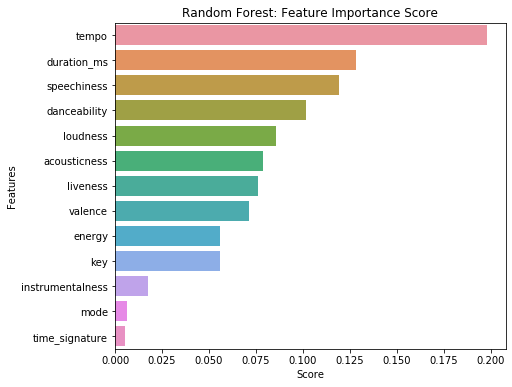

In [83]:
rfr_feat_imp = pd.DataFrame(rfr.feature_importances_, index=X_train.columns).sort_values(by=0,ascending=False)
# turning it into a Dataframe makes it easier to work with

plt.figure(figsize=[7,6])
sns.barplot(y=rfr_feat_imp.index,x=rfr_feat_imp[0],orient='h');
plt.title('Random Forest: Feature Importance Score');
plt.ylabel('Features');
plt.xlabel('Score');

# End of Vanilla Models

# Feature Engineering

In [84]:
df['artist_name'].nunique()

273

In [85]:
df.shape

(725, 19)

In [86]:
# Change artist names to numbers 

In [87]:
df.head()

,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,type,valence,feature_artist/songname
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,100,0.2210,0.700,140526.0,0.722,0.000000,7.0,0.2720,-3.558,0.0,0.0369,90.989,4.0,audio_features,0.756,Mood (feat. iann dior)
1,Cardi B,WAP (feat. Megan Thee Stallion),4Oun2ylbjFKMPTiaSbbCih,97,0.0194,0.935,187541.0,0.454,0.000000,1.0,0.0824,-7.509,1.0,0.3750,133.073,4.0,audio_features,0.357,WAP (feat. Megan Thee Stallion)
2,Pop Smoke,For The Night (feat. Lil Baby & DaBaby),0PvFJmanyNQMseIFrU708S,95,0.1140,0.823,190476.0,0.586,0.000000,6.0,0.1930,-6.606,0.0,0.2000,125.971,4.0,audio_features,0.347,For The Night (feat. Lil Baby & DaBaby)
3,Drake,Laugh Now Cry Later (feat. Lil Durk),2SAqBLGA283SUiwJ3xOUVI,94,0.2440,0.761,261493.0,0.518,0.000035,0.0,0.1070,-8.871,1.0,0.1340,133.976,4.0,audio_features,0.522,Laugh Now Cry Later (feat. Lil Durk)
4,Pop Smoke,What You Know Bout Love,1tkg4EHVoqnhR6iFEXb60y,96,0.6500,0.709,160000.0,0.548,0.000002,10.0,0.1330,-8.493,1.0,0.3530,83.995,4.0,audio_features,0.543,What You Know Bout Love


In [88]:
pop_df = df.groupby('artist_name').agg({'popularity':'mean'}).reset_index()

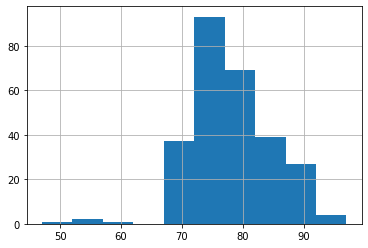

In [89]:
pop_df['popularity'].hist()

In [94]:
names = [i for i in df['artist_name']]

In [97]:
len(names)

725

In [104]:
nums = [i for i in range(725)]

In [106]:
names_dict = dict(zip(names,nums))

In [107]:
names_dict

{'24kGoldn': 144,
 'Cardi B': 1,
 'Pop Smoke': 712,
 'Drake': 613,
 'Internet Money': 598,
 'Justin Bieber': 460,
 'DaBaby': 723,
 'The Weeknd': 282,
 'Juice WRLD': 424,
 'BTS': 654,
 'Conan Gray': 102,
 'Ariana Grande': 108,
 'Jack Harlow': 530,
 'Bad Bunny': 694,
 'Tate McRae': 561,
 'DJ Khaled': 63,
 'Ritt Momney': 19,
 'Luke Combs': 717,
 'Polo G': 722,
 '21 Savage': 611,
 'Shawn Mendes': 26,
 'Kane Brown': 449,
 'Machine Gun Kelly': 718,
 'Chris Brown': 30,
 'Ashnikko': 33,
 'Miley Cyrus': 626,
 'Big Sean': 618,
 'Powfu': 38,
 'Morgan Wallen': 65,
 'Money Man': 446,
 'Don Toliver': 377,
 'CORPSE': 661,
 'Gunna': 533,
 'Joel Corry': 44,
 'The Kid LAROI': 682,
 'Jawsh 685': 555,
 'Dua Lipa': 628,
 'DDG': 54,
 'Lil Baby': 706,
 'Rod Wave': 442,
 'blackbear': 435,
 'Lil Mosey': 96,
 'Travis Scott': 389,
 'J Balvin': 612,
 'Lee Brice': 68,
 'Jason Derulo': 69,
 'Megan Thee Stallion': 227,
 'Noah Cyrus': 641,
 'salem ilese': 78,
 'THE SCOTTS': 79,
 'Future': 604,
 'AJR': 81,
 'StaySolid